# Generator Scores

In [1]:
from tqdm import tqdm
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import shuffle
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from tqdm import tqdm
from keras.preprocessing import image
import os
from os import listdir
from os.path import join, isfile
import numpy as np
from matplotlib import pyplot
from keras.models import load_model
from keras.preprocessing.image import img_to_array, array_to_img
from keras.preprocessing.image import load_img
from numpy import expand_dims
#from skimage.transform import resize
from scipy.linalg import sqrtm
from skimage.transform import resize

In [2]:
def load_image(filename, size=(256,256)):
    # load image with the preferred size
    pixels = load_img(filename, target_size=size)
    # convert to numpy array
    pixels = img_to_array(pixels)
    # scale from [0,255] to [-1,1]
    pixels = (pixels - 127.5) / 127.5
    # reshape to 1 sample
    pixels = expand_dims(pixels, 0)
    return pixels

# Testing Validation Set

In [3]:
from tqdm import tqdm
from os import listdir
from os.path import join, isfile
from keras.preprocessing import image
import numpy as np
from matplotlib import pyplot

In [4]:
g_model = load_model('Shoes_Checkpoints/model_aug_ck_0051000.h5')

In [5]:
def test_images(path, size=(256,512)):
    i = 0
    for filename in tqdm(listdir(path)):
        if i >= 1110:
            break     
        img = load_image(path+filename)
        print(img.shape)
        pred = g_model.predict(img)
        pred = (pred + 1) / 2.0
        pyplot.imsave('Validation_results/'+filename +'.jpg', pred[0])
        i += 1
    print('i: {}'.format(i))

In [6]:
test_images('val_train_s/')

  0%|                                                                                          | 0/200 [00:00<?, ?it/s]

(1, 256, 256, 3)


  2%|█▏                                                                                | 3/200 [00:03<02:38,  1.24it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


  2%|██                                                                                | 5/200 [00:03<01:23,  2.33it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


  4%|███▋                                                                              | 9/200 [00:03<00:38,  4.95it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


  6%|████▍                                                                            | 11/200 [00:03<00:29,  6.33it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


  8%|██████                                                                           | 15/200 [00:03<00:20,  9.10it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 10%|███████▋                                                                         | 19/200 [00:04<00:16, 11.23it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 10%|████████▌                                                                        | 21/200 [00:04<00:14, 12.05it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 12%|██████████▏                                                                      | 25/200 [00:04<00:13, 13.26it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 14%|██████████▉                                                                      | 27/200 [00:04<00:13, 13.15it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 16%|████████████▌                                                                    | 31/200 [00:05<00:12, 13.82it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 16%|█████████████▎                                                                   | 33/200 [00:05<00:12, 13.86it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 18%|██████████████▉                                                                  | 37/200 [00:05<00:11, 13.63it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 20%|███████████████▊                                                                 | 39/200 [00:05<00:11, 13.85it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 22%|█████████████████▍                                                               | 43/200 [00:05<00:11, 13.69it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 22%|██████████████████▏                                                              | 45/200 [00:06<00:11, 13.69it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 24%|███████████████████▊                                                             | 49/200 [00:06<00:11, 13.69it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 26%|████████████████████▋                                                            | 51/200 [00:06<00:11, 13.20it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 28%|██████████████████████▎                                                          | 55/200 [00:06<00:10, 13.37it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 28%|███████████████████████                                                          | 57/200 [00:06<00:10, 13.41it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 30%|████████████████████████▋                                                        | 61/200 [00:07<00:10, 13.62it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 32%|█████████████████████████▌                                                       | 63/200 [00:07<00:10, 13.57it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 34%|███████████████████████████▏                                                     | 67/200 [00:07<00:09, 13.44it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 36%|████████████████████████████▊                                                    | 71/200 [00:07<00:09, 13.90it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 36%|█████████████████████████████▌                                                   | 73/200 [00:08<00:09, 13.95it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 38%|██████████████████████████████▍                                                  | 75/200 [00:08<00:09, 13.84it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 40%|███████████████████████████████▉                                                 | 79/200 [00:08<00:09, 12.86it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 40%|████████████████████████████████▊                                                | 81/200 [00:08<00:09, 13.00it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 42%|██████████████████████████████████▍                                              | 85/200 [00:09<00:08, 13.18it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 44%|████████████████████████████████████                                             | 89/200 [00:09<00:08, 13.54it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 46%|████████████████████████████████████▊                                            | 91/200 [00:09<00:08, 13.35it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 46%|█████████████████████████████████████▋                                           | 93/200 [00:09<00:08, 12.95it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 48%|███████████████████████████████████████▎                                         | 97/200 [00:09<00:07, 13.58it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 50%|████████████████████████████████████████▍                                       | 101/200 [00:10<00:07, 13.85it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 52%|█████████████████████████████████████████▏                                      | 103/200 [00:10<00:06, 13.86it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 52%|██████████████████████████████████████████                                      | 105/200 [00:10<00:06, 14.05it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 55%|███████████████████████████████████████████▌                                    | 109/200 [00:10<00:06, 14.16it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 56%|█████████████████████████████████████████████▏                                  | 113/200 [00:11<00:06, 14.16it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 58%|██████████████████████████████████████████████▊                                 | 117/200 [00:11<00:07, 11.79it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 60%|███████████████████████████████████████████████▌                                | 119/200 [00:11<00:06, 12.51it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 62%|█████████████████████████████████████████████████▏                              | 123/200 [00:11<00:05, 13.30it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 64%|██████████████████████████████████████████████████▊                             | 127/200 [00:12<00:05, 13.89it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 64%|███████████████████████████████████████████████████▌                            | 129/200 [00:12<00:05, 14.09it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 66%|█████████████████████████████████████████████████████▏                          | 133/200 [00:12<00:04, 14.27it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 68%|██████████████████████████████████████████████████████▊                         | 137/200 [00:12<00:04, 13.89it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 70%|████████████████████████████████████████████████████████▍                       | 141/200 [00:13<00:04, 14.01it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 72%|█████████████████████████████████████████████████████████▏                      | 143/200 [00:13<00:04, 14.06it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 72%|██████████████████████████████████████████████████████████                      | 145/200 [00:13<00:03, 14.21it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 74%|███████████████████████████████████████████████████████████▌                    | 149/200 [00:13<00:03, 13.21it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)


 76%|████████████████████████████████████████████████████████████▍                   | 151/200 [00:13<00:03, 13.20it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 76%|█████████████████████████████████████████████████████████████▏                  | 153/200 [00:14<00:03, 13.42it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 78%|██████████████████████████████████████████████████████████████▊                 | 157/200 [00:14<00:03, 13.15it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 80%|███████████████████████████████████████████████████████████████▌                | 159/200 [00:14<00:03, 13.29it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 82%|█████████████████████████████████████████████████████████████████▏              | 163/200 [00:14<00:02, 13.43it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 82%|██████████████████████████████████████████████████████████████████              | 165/200 [00:14<00:02, 13.14it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 84%|███████████████████████████████████████████████████████████████████▌            | 169/200 [00:15<00:02, 13.19it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 86%|█████████████████████████████████████████████████████████████████████▏          | 173/200 [00:15<00:01, 13.58it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 88%|██████████████████████████████████████████████████████████████████████          | 175/200 [00:15<00:01, 13.75it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 88%|██████████████████████████████████████████████████████████████████████▊         | 177/200 [00:15<00:01, 13.00it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 90%|████████████████████████████████████████████████████████████████████████▍       | 181/200 [00:16<00:01, 12.85it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 92%|█████████████████████████████████████████████████████████████████████████▏      | 183/200 [00:16<00:01, 12.61it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 94%|██████████████████████████████████████████████████████████████████████████▊     | 187/200 [00:16<00:00, 13.01it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 94%|███████████████████████████████████████████████████████████████████████████▌    | 189/200 [00:16<00:00, 13.06it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 193/200 [00:17<00:00, 13.37it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 98%|██████████████████████████████████████████████████████████████████████████████▊ | 197/200 [00:17<00:00, 13.70it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


100%|███████████████████████████████████████████████████████████████████████████████▌| 199/200 [00:17<00:00, 13.74it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:17<00:00, 11.34it/s]

i: 200


# Frechet Inception Distance 

In [7]:
def load_image(path, size = (256,256)):
    imgs_list = []
    i = 0
    for filename in tqdm(listdir(path)):
        if i >= 201:
            break
        img = image.load_img(path + filename, target_size=size)       
        #pyplot.imshow(img)
        #pyplot.axis('off')
        img = image.img_to_array(img)
        img = (img + 1) / 2.0
        imgs_list.append(img)
        i += 1
    return imgs_list

In [8]:
images1 = load_image('Validation_results/')
images2 = load_image('val_train_i/')

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 557.11it/s]


In [9]:
images1 = np.asarray(images1)
images2 = np.asarray(images2)

In [10]:
print(type(images1))
print(type(images2))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


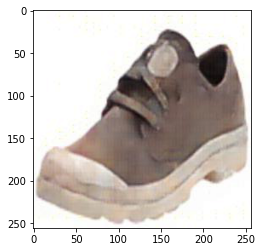

In [11]:
i=0
for img in images1:
    if i >= 1:
        break
    pyplot.imshow(array_to_img(img))
    i+=1

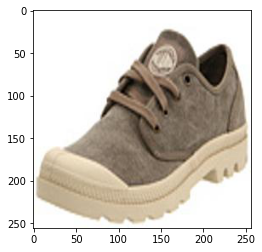

In [12]:
i=0
for img in images2:
    if i >= 1:
        break
    pyplot.imshow(array_to_img(img))
    i+=1

In [13]:
# scale an array of images to a new size
def scale_images(images, new_shape):
    images_list = list()
    for image in images:
    # resize with nearest neighbor interpolation
        new_image = resize(image, new_shape, 0)
    # store
        images_list.append(new_image)
    return asarray(images_list)

In [14]:
# calculate frechet inception distance
def calculate_fid(model, images1, images2):
    # calculate activations
    act1 = model.predict(images1)
    act2 = model.predict(images2)
    # calculate mean and covariance statistics
    mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
    # calculate sum squared difference between means
    ssdiff = np.sum((mu1 - mu2)**2.0)
    # calculate sqrt of product between cov
    covmean = sqrtm(sigma1.dot(sigma2))
    # check and correct imaginary numbers from sqrt
    if iscomplexobj(covmean):
        covmean = covmean.real
    # calculate score
    fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid

In [15]:
# prepare the inception v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))
print('Prepared', images1.shape, images2.shape)
# convert integer to floating point values
images1 = images1.astype('float32')
images2 = images2.astype('float32')
# resize images
images1 = scale_images(images1, (299,299,3))
images2 = scale_images(images2, (299,299,3))
print('Scaled', images1.shape, images2.shape)
# pre-process images
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
# fid between images1 and images1
fid = calculate_fid(model, images1, images1)
print('FID (same): %.3f' % fid)
# fid between images1 and images2
fid = calculate_fid(model, images1, images2)
print('FID (different): %.3f' % fid)


Prepared (200, 256, 256, 3) (200, 256, 256, 3)
Scaled (200, 299, 299, 3) (200, 299, 299, 3)
FID (same): -0.000
FID (different): 96.514
